In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [15]:
# Caluclate Static VAR
from scipy.stats import norm
CL = 0.95 # Confidence level
TRADING_DAYS = 252
portfolio_val=950000
volatility = 0.307
t=21
cutoff=norm.ppf(CL)
VaR = portfolio_val*volatility*np.sqrt(t/TRADING_DAYS)*cutoff
print("At {:.2f} confidence level, loss will not exceet {:,.2f}".format(CL,VaR))
print("This represents a move of {:.2f} standard deviation below the expected return".format(cutoff))

At 0.95 confidence level, loss will not exceet 138,483.69
This represents a move of 1.64 standard deviation below the expected return


##### 2. Parameters of 1-stock portfolio to use in MC Simulation

In [16]:
aapl = 4000
aapl_price = pdr.get_quote_yahoo('AAPL')['price']
aapl_value = aapl*aapl_price
aapl_value = aapl_value.at['AAPL']
t=21/252
rfr=0.02
volatility=.307
iteration=50000

In [17]:
aapl_price

AAPL    316.96
Name: price, dtype: float64

#### 3. Define VaR function

In [18]:
def VaR (pv,rfr,vol,T,iteration):
    end=pv*np.exp((rfr-.5*vol**2)*T+
                 vol*np.sqrt(T)*np.random.standard_normal(iteration))
    ending_values=end-pv
    return ending_values

#### Run Simulation

In [19]:
at_risk=VaR(aapl_value,rfr,volatility,t,iteration)

#### Visualize Portfolio

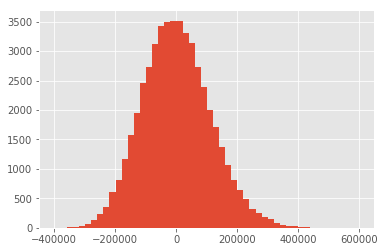

In [20]:
with plt.style.context('ggplot'):
    plt.hist(at_risk,bins=50)

#### Numerical

In [21]:
percentile=[1,5,10]
print("Portfolio Value: ${:,.0f}".format(aapl*aapl_price[0]))
print("-"*35)
for value in percentile:
    print("VaR {:.0%} confidence level: ${:,.0f}".format((100-value)/100,np.percentile(at_risk,value)))


Portfolio Value: $1,267,840
-----------------------------------
VaR 99% confidence level: $-237,754
VaR 95% confidence level: $-174,094
VaR 90% confidence level: $-138,626
